<a href="https://colab.research.google.com/github/bpriantti/projetoEDA_sazonalidade_temporal_ibovespa/blob/main/Projeto_E_D_A_Sazonalidade_Temporal_Ibovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto E.D.A - Sazonalidade Temporal Ibovespa
____

__Bussines Problem:__  


> Durante a rotina de investimentos torna-se atrativo ter uma estimativa de análise da série histórica de dados para análise de melhores meses do ponto de vista de probabilidade de retorno positivo ou negativo e retorno de investimento médio esperado.


__Business Problem Question:__

> __“Existe melhor mês para investimento no índice Ibovespa se sim qual mês ao longo da série histórica tendem a ser mais positivos e rentáveis para compra ou venda ?”__

> A resposta dessa pergunta aliada a outros fatores como análise de cenário macroeconômico dentre outros pontos podem contribuir para a instituição na melhoria dos resultados e performance.      
  
__Objetivo:__   

> Desenvolver um script que realiza a análise exploratória da série histórica do índice Ibovespa e possibilita verificar quais os meses foram mais positivos,negativos atrativos do ponto de vista da rentabilidade para a compra e para venda.

__Autor:__  
   - Bruno Priantti.
    
__Contato:__  
  - bpriantti@gmail.com

__Encontre-me:__  
   -  https://www.linkedin.com/in/bpriantti/  
   -  https://github.com/bpriantti
   -  https://www.instagram.com/brunopriantti/
   

# Resultados Obtidos:
___
&nbsp;  
tornou-se possível concluir com a análise exploratória dos dados ao final do estudo que:
&nbsp;  

__Sazonalidade Temporal Ibovespa:__ 
&nbsp;
       
Ativo: ^BVSP Periodo:  1995-01-01 a 2022-06-30 :
 
- Quais são os meses que mais tendem a fechar positivo?
&nbsp;    
> R:   ['dec' 'abr' 'jul']
 
- Quais são os meses que mais tendem a fechar negativo?
> R:   ['jan' 'mai' 'mar']
 
- Quais são os meses que mais tendem a serem rentaveis para a compra?
> R:   ['nov' 'abr' 'dec']
 
- Quais são os meses que mais tendem a serem rentaveis para a venda? 
> R:   ['ago' 'mai' 'jun']
 
- Quais são os meses que mais tendem a serem rentaveis para a compra e a fecharem positivos ?
> R:   ['dec' 'abr' 'jul']
 
- Quais são os meses que mais tendem a serem rentaveis para a venda e a fecharem negativos ?
> R:   ['mai' 'jan' 'ago']
 
- Qual trimestre tende a fechar mais positivo ?
> R:   tri4
 
- Qual trimestre tende a fechar mais negativo ?
> R:   tri1

#Python Codes:
___ 

# install non-native libs:

In [103]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#import libs:

In [104]:
#libs wralling dados:
import pandas as pd
import numpy as np

#libs para visualization dos dados:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
import plotly.express as px

#lib para api com ativos da bolsa:
import yfinance as yf

#---
import warnings
warnings.filterwarnings("ignore")

# conexao api, request data base:

In [105]:
#ticker para analise:
ticker = "^BVSP"

#datas - atentar para inicio em janeiro do ano de inicio do ativo ou proximo.
start =  "1995-01-01" 
end =    "2022-06-30"

#implement dataset
data = pd.DataFrame()

#API - yahoo finance:
data['IBOV'] = yf.download(ticker, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [106]:
#inpect dataset:
data.head()

,IBOV
Date,
1995-01-02,4301.000000
1995-01-03,4098.000000
1995-01-04,3967.899902
1995-01-05,4036.699951
1995-01-06,3827.399902


In [107]:
#inspect dataset:
data.tail()

,IBOV
Date,
2022-06-23,98080.0
2022-06-24,98672.0
2022-06-27,100764.0
2022-06-28,100591.0
2022-06-29,99622.0


#visualizando dados de fechamento:

In [108]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=data.index, y=data['IBOV']))

fig.update_layout(height=600, width=1000,
                 title_text="Adjusted Close - Ibovespa Index: ")
fig.show()


# data wralling dados - extraindo dia mes/ano/semana

In [109]:
#-----------------------------------:
data = data.reset_index()

#extraindo o dia da semana:
data['week day'] = data['Date'].apply(lambda x:x.strftime('%A'))

#extraindo o mes:
data['month'] = data['Date'].apply(lambda x:x.strftime('%m'))

#extraindo o ano:
data['year'] = data['Date'].apply(lambda x:x.strftime('%Y'))

#visualizando
data.head()

,Date,IBOV,week day,month,year
0,1995-01-02,4301.000000,Monday,01,1995
1,1995-01-03,4098.000000,Tuesday,01,1995
2,1995-01-04,3967.899902,Wednesday,01,1995
3,1995-01-05,4036.699951,Thursday,01,1995
4,1995-01-06,3827.399902,Friday,01,1995


#calculando retornos diarios:

In [110]:
#calculo dos retornos diarios:
data['daily_return'] = data['IBOV'].pct_change(1)

#inspecionando o dataframe:
data.head()

,Date,IBOV,week day,month,year,daily_return
0,1995-01-02,4301.000000,Monday,01,1995,NaN
1,1995-01-03,4098.000000,Tuesday,01,1995,-0.047198
2,1995-01-04,3967.899902,Wednesday,01,1995,-0.031747
3,1995-01-05,4036.699951,Thursday,01,1995,0.017339
4,1995-01-06,3827.399902,Friday,01,1995,-0.051849


#calculando retornos mensais:

In [111]:
#calculando os retornos mensais
data_month = data[['daily_return','month','year']].groupby(['year','month']).agg('sum')

data_month_1 = data_month.loc[data.year[0]]

data_month_1.columns = [data.year[0]]

for x in range(int(data.year[0])+1,int(data.year.iloc[-1]),1):
    data_month_1[str(x)] = data_month.loc[str(x)]

data_month_1 = data_month_1.transpose()

In [112]:
#dados agrupados por retorno mensal/ano:
data_month_1

month,01,02,03,04,05,06,07,08,09,10,11,12
1995,-0.072753,-0.153792,-0.027679,0.256419,-0.019304,-0.025965,0.076839,0.111866,0.082205,-0.118061,0.065214,-0.015598
1996,0.185331,-0.035879,0.002683,0.042374,0.105739,0.056957,0.017632,0.024297,0.030046,0.014348,0.020704,0.055872
1997,0.125872,0.107106,0.026654,0.100693,0.130058,0.104965,0.041542,-0.184966,0.115737,-0.244848,0.067235,0.088802
1998,-0.041201,0.085543,0.123900,-0.019055,-0.162929,-0.006318,0.104342,-0.488126,0.079794,0.088864,0.213742,-0.224184
1999,0.253112,0.093476,0.192026,0.062215,-0.015942,0.050141,-0.105695,0.014688,0.052325,0.053972,0.166926,0.218349
2000,-0.035939,0.077925,0.013738,-0.129401,-0.032422,0.115985,-0.012722,0.055738,-0.083155,-0.063814,-0.109845,0.143624
2001,0.151362,-0.103195,-0.091228,0.039487,-0.015735,-0.003728,-0.054268,-0.067075,-0.178586,0.072071,0.135128,0.052750
2002,-0.061705,0.100364,-0.053728,-0.011007,-0.013769,-0.137370,-0.124806,0.068081,-0.180923,0.175310,0.034614,0.071757
2003,-0.025237,-0.059712,0.095333,0.110704,0.069574,-0.032435,0.046485,0.114232,0.055795,0.119271,0.117360,0.098316
2004,-0.011739,0.000718,0.023707,-0.118298,0.003237,0.081886,0.056906,0.023319,0.020485,-0.006618,0.087609,0.042730


In [113]:
#ajuste labels:
month_labels = {1: 'jan', 2: 'fev', 3: 'mar', 4: 'abr', 5: 'mai', 6: 'jun', 7: 'jul', 8: 'ago',
                9: 'set', 10: 'out', 11: 'nov', 12: 'dec'}

data_month_1.columns = month_labels.values()
data_month_1 = data_month_1.transpose()

#inspecionando dados:
data_month_1

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
jan,-0.072753,0.185331,0.125872,-0.041201,0.253112,-0.035939,0.151362,-0.061705,-0.025237,-0.011739,...,0.107178,-0.018511,-0.076658,-0.060951,-0.067116,0.072973,0.107266,0.104249,-0.017409,-0.025785
fev,-0.153792,-0.035879,0.107106,0.085543,0.093476,0.077925,-0.103195,0.100364,-0.059712,0.000718,...,0.043808,-0.039341,-0.009518,0.096564,0.061748,0.031268,0.008597,-0.017019,-0.084083,-0.050213
mar,-0.027679,0.002683,0.026654,0.123900,0.192026,0.013738,-0.091228,-0.053728,0.095333,0.023707,...,-0.018181,-0.017527,0.069862,-0.006134,0.163512,-0.023596,-0.000604,0.000786,-0.289188,0.060723
abr,0.256419,0.042374,0.100693,-0.019055,0.062215,-0.129401,0.039487,-0.011007,0.110704,-0.118298,...,-0.041254,-0.005570,0.025238,0.096214,0.077991,0.007382,0.009836,0.010962,0.106504,0.019906
mai,-0.019304,0.105739,0.130058,-0.162929,-0.015942,-0.032422,-0.015735,-0.013769,0.069574,0.003237,...,-0.122805,-0.042918,-0.006074,-0.062232,-0.104143,-0.036269,-0.111990,0.008693,0.086163,0.060845
jun,-0.025965,0.056957,0.104965,-0.006318,0.050141,0.115985,-0.003728,-0.137370,-0.032435,0.081886,...,0.000446,-0.116877,0.038186,0.007396,0.064183,0.003723,-0.051016,0.040729,0.086890,0.005197
jul,0.076839,0.017632,0.041542,0.104342,-0.105695,-0.012722,-0.054268,-0.124806,0.046485,0.056906,...,0.035117,0.019065,0.050032,-0.041187,0.107297,0.047434,0.086196,0.009100,0.081585,-0.038671
ago,0.111866,0.024297,-0.184966,-0.488126,0.014688,0.055738,-0.067075,0.068081,0.114232,0.023319,...,0.018819,0.038414,0.094886,-0.083932,0.011561,0.072696,-0.030125,-0.004170,-0.033180,-0.023872
set,0.082205,0.030046,0.115737,0.079794,0.052325,-0.083155,-0.178586,-0.180923,0.055795,0.020485,...,0.038218,0.047800,-0.121440,-0.031615,0.010318,0.048402,0.035775,0.035546,-0.047109,-0.065019
out,-0.118061,0.014348,-0.244848,0.088864,0.053972,-0.063814,0.072071,0.175310,0.119271,-0.006618,...,-0.035398,0.037431,0.018562,0.020431,0.107345,0.001298,0.101800,0.024742,-0.004262,-0.067240


In [114]:
#implementado dataset binario(positivo/negativo):
data_month_binario = data_month_1 > 0 

#inpecionando dataset:
data_month_binario

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
jan,False,True,True,False,True,False,True,False,False,False,...,True,False,False,False,False,True,True,True,False,False
fev,False,False,True,True,True,True,False,True,False,True,...,True,False,False,True,True,True,True,False,False,False
mar,False,True,True,True,True,True,False,False,True,True,...,False,False,True,False,True,False,False,True,False,True
abr,True,True,True,False,True,False,True,False,True,False,...,False,False,True,True,True,True,True,True,True,True
mai,False,True,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,True,True
jun,False,True,True,False,True,True,False,False,False,True,...,True,False,True,True,True,True,False,True,True,True
jul,True,True,True,True,False,False,False,False,True,True,...,True,True,True,False,True,True,True,True,True,False
ago,True,True,False,False,True,True,False,True,True,True,...,True,True,True,False,True,True,False,False,False,False
set,True,True,True,True,True,False,False,False,True,True,...,True,True,False,False,True,True,True,True,False,False
out,False,True,False,True,True,False,True,True,True,False,...,False,True,True,True,True,True,True,True,False,False


#data visualization:

visualizando box-plot retornos mensais:

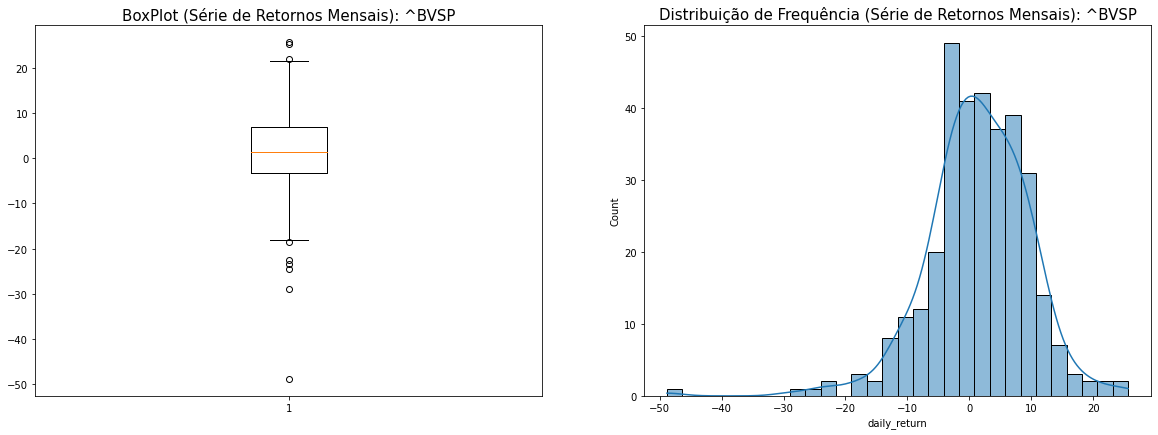

In [115]:
plt.figure(figsize = (20,15))

data_plot = data_month.daily_return*100

#plot dados:
plt.subplot(2, 2, 1)
plt.boxplot(data_plot);
plt.title(f'BoxPlot (Série de Retornos Mensais): {ticker}', fontsize=15)

plt.subplot(2, 2, 2)
sns.histplot(data_plot, bins = 30,kde = True)
plt.title(f'Distribuição de Frequência (Série de Retornos Mensais): {ticker}', fontsize=15)
plt.savefig("image_1.png")
plt.show();

In [116]:
data_plot.describe()

count    330.000000
mean       1.392821
std        8.366484
min      -48.812598
25%       -3.181885
50%        1.451786
75%        6.781936
max       25.641853
Name: daily_return, dtype: float64

visualizando heatmap retornos MonthxYear

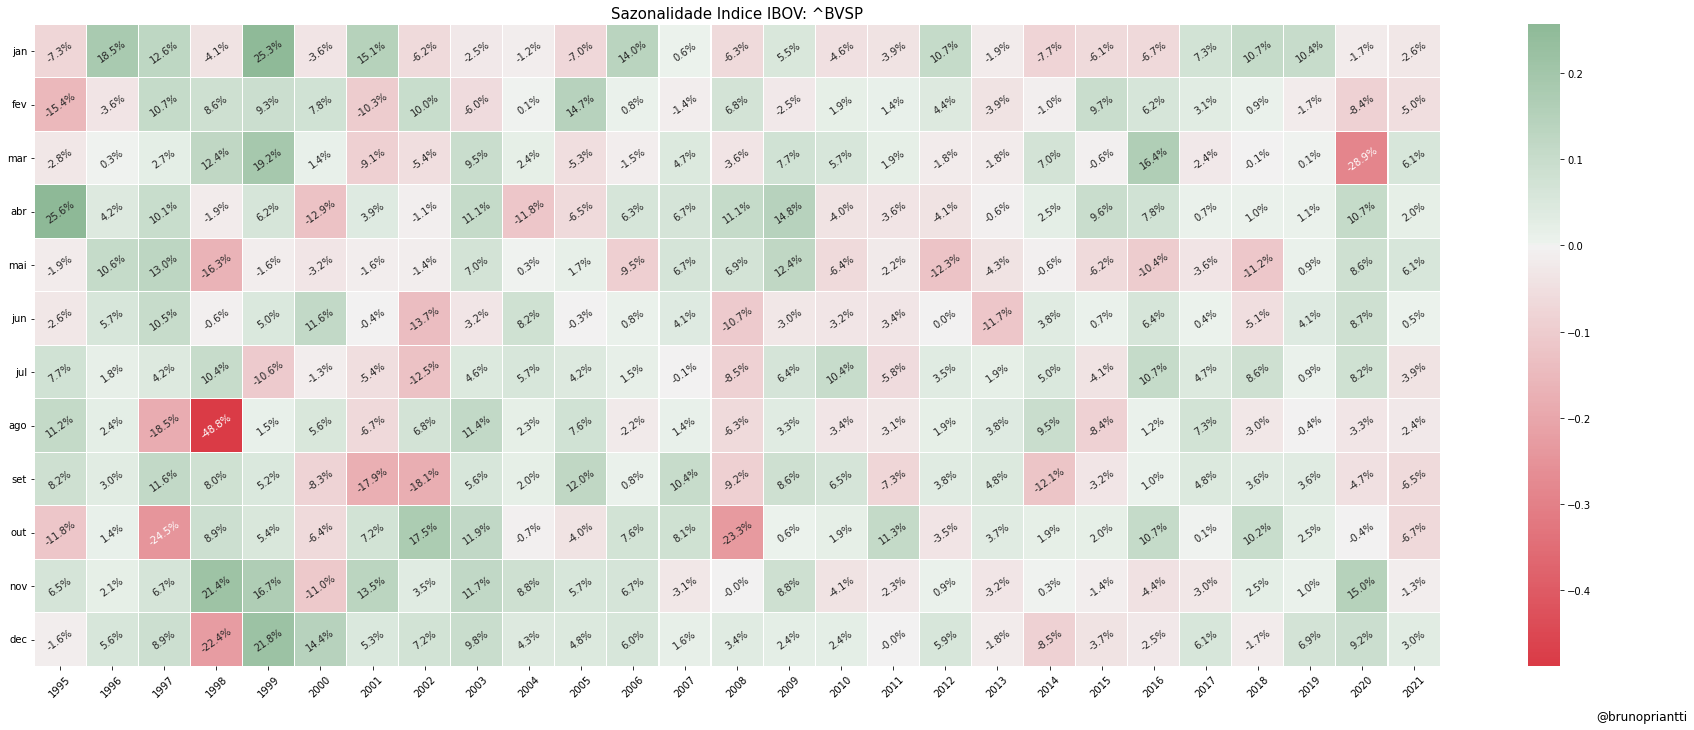

In [117]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)
g = sns.heatmap(data= data_month_1, cmap=cmap,cbar=True,linewidths=.1,annot=True,fmt=".1%",annot_kws={'rotation':35},center=0.00,xticklabels=True)

g.figure.set_size_inches(w=80/2.54, h=30/2.54)
g.text(30, 13,'@brunopriantti', fontsize=12)
g.set_title(f'Sazonalidade Indice IBOV: {ticker}',fontdict = { 'fontsize': 15});

g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10)
plt.savefig("image_2.png")
plt.show();

visualizando boxplot segregado por month:

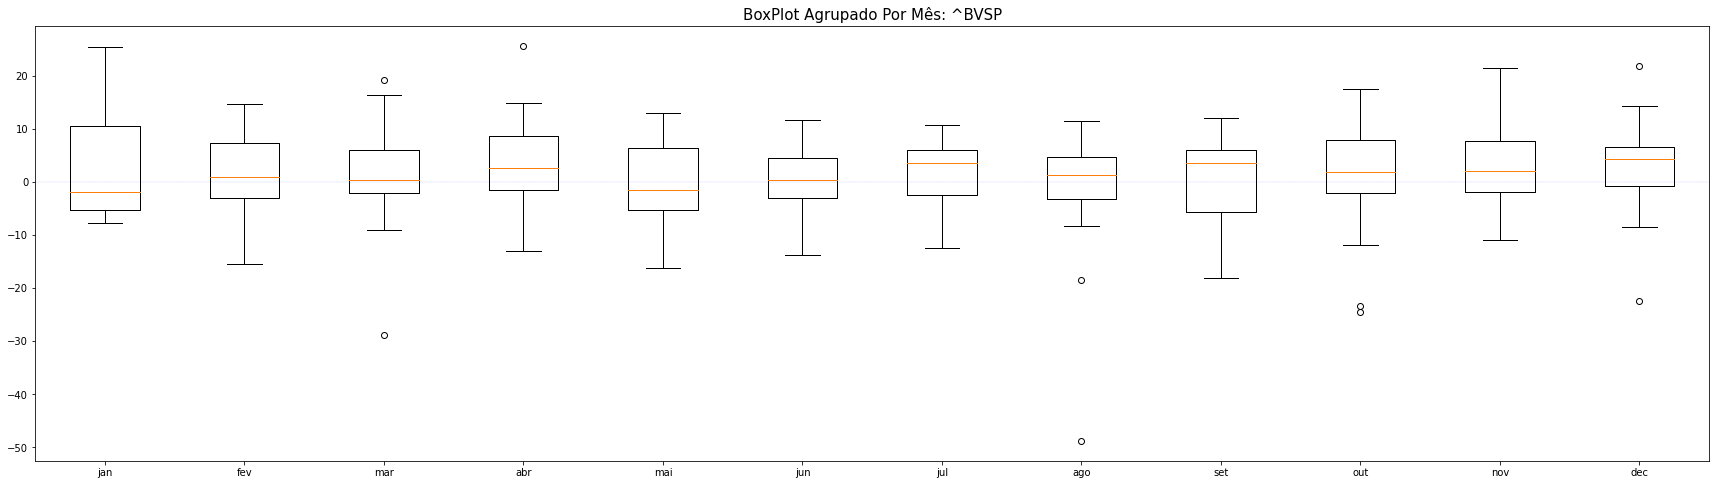

In [118]:
df = data_month_1.transpose() *100

lista = []
for x in df.columns: lista.append(df[x])

fig,ax = plt.subplots(figsize = (30,8))
plt.boxplot(lista);
plt.axhline(y=0, xmin=0, xmax=12, color='b', linestyle='-.', linewidth=0.1, label='blue line')

ax.set_xticklabels(month_labels.values())
ax.set_title(f'BoxPlot Agrupado Por Mês: {ticker}',fontdict = { 'fontsize': 15})

plt.savefig("image_3.png")
plt.show();

# Exploratory Data Analisys:

Agrupamento dataframe:

In [120]:
#somando meses
contagem_positivo = (data_month_binario.transpose() == True ).sum()
contagem_negativo = (data_month_binario.transpose() == False).sum()

#porcentagem
percento_positivo = round(contagem_positivo/21,2)*100
percento_negativo = round(contagem_negativo/21,2)*100
dif = percento_positivo - percento_negativo

#medidas
media     = data_month_1.transpose().mean()
mediana   = data_month_1.transpose().median()
soma      = data_month_1.transpose().sum()

d = {'n_Positivo': contagem_positivo, 'n_Negativo': contagem_negativo, '% Positivo': percento_positivo, '% Negativo': percento_negativo,'% Dif': dif}

#somando meses
media     = data_month_1.transpose().mean()
mediana   = data_month_1.transpose().median()

d2 = {'Rent. Media': media, 'Rent. Mediana': mediana}

data_end = pd.concat([pd.DataFrame(data=d), round(pd.DataFrame(data=d2),4) *100], axis=1)

lista_rank = []

#data_set agrupado:
data_end


,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
jan,11,16,52.0,76.0,-24.0,2.13,-1.85
fev,16,11,76.0,52.0,24.0,1.38,0.86
mar,15,12,71.0,57.0,14.0,1.27,0.27
abr,18,9,86.0,43.0,43.0,3.30,2.52
mai,11,16,52.0,76.0,-24.0,-0.69,-1.57
jun,15,12,71.0,57.0,14.0,0.47,0.37
jul,18,9,86.0,43.0,43.0,1.79,3.51
ago,15,12,71.0,57.0,14.0,-1.09,1.37
set,18,9,86.0,43.0,43.0,0.60,3.55
out,18,9,86.0,43.0,43.0,1.17,1.87


Extraindo Rank com os meses que mais foram positivos (Top 3):

In [121]:
data = data_end.sort_values(by=['% Positivo'], ascending=False).head(3)
lista_rank.append(data.index)
data

,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
dec,19,8,90.0,38.0,52.0,3.22,4.27
abr,18,9,86.0,43.0,43.0,3.30,2.52
jul,18,9,86.0,43.0,43.0,1.79,3.51


Extraindo Rank com os meses que mais foram negativos (Top 3):

In [122]:
data = data_end.sort_values(by=['% Positivo'], ascending=True).head(3)
lista_rank.append(data.index)
data

,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
jan,11,16,52.0,76.0,-24.0,2.13,-1.85
mai,11,16,52.0,76.0,-24.0,-0.69,-1.57
mar,15,12,71.0,57.0,14.0,1.27,0.27


Extraindo Rank com os meses que mais foram rentaveis para compra(Top 3):  
(considerando media dos retornos e mediana). 

In [123]:
data = data_end.sort_values(by=['Rent. Media','Rent. Mediana'], ascending=False).head(3)
lista_rank.append(data.index)
data

,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
nov,17,10,81.0,48.0,33.0,3.63,2.07
abr,18,9,86.0,43.0,43.0,3.30,2.52
dec,19,8,90.0,38.0,52.0,3.22,4.27


Extraindo Rank com os meses que mais foram rentaveis para venda(Top 3):  
(considerando media dos retornos e  mediana).

In [124]:
data = data_end.sort_values(by=['Rent. Media','Rent. Mediana'], ascending=True).head(3)
lista_rank.append(data.index)
data

,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
ago,15,12,71.0,57.0,14.0,-1.09,1.37
mai,11,16,52.0,76.0,-24.0,-0.69,-1.57
jun,15,12,71.0,57.0,14.0,0.47,0.37


Extraindo Rank com os meses que mais foram rentaveis para compra(Top 3):  
(Considerando Media dos Retornos, Mediana e % Fechamentos Positivos).

In [125]:
data = data_end.sort_values(by=['% Positivo','Rent. Media','Rent. Mediana'], ascending=False).head(3)
lista_rank.append(data.index)
data

,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
dec,19,8,90.0,38.0,52.0,3.22,4.27
abr,18,9,86.0,43.0,43.0,3.30,2.52
jul,18,9,86.0,43.0,43.0,1.79,3.51


Extraindo Rank com os meses que mais foram rentaveis para venda(Top 3):  
(Considerando Media dos Retornos, Mediana e % Fechamentos Positivos).

In [126]:
data = data_end.sort_values(by=['% Positivo','Rent. Media','Rent. Mediana'], ascending=True).head(3)
lista_rank.append(data.index)
data

,n_Positivo,n_Negativo,% Positivo,% Negativo,% Dif,Rent. Media,Rent. Mediana
mai,11,16,52.0,76.0,-24.0,-0.69,-1.57
jan,11,16,52.0,76.0,-24.0,2.13,-1.85
ago,15,12,71.0,57.0,14.0,-1.09,1.37


Extraindo Performance por Trimestres:

In [127]:
#Rank mellhor e Pior Trimestre ?

data_conclusao_tri = data_end.transpose()

#specify the columns to sum
tri1 = ['jan', 'fev', 'mar']
tri2 = ['abr', 'mai', 'jun']
tri3 = ['jul', 'ago', 'set']
tri4 = ['out', 'nov', 'dec']

meses = [tri1, tri2, tri3, tri4]

#find sum of columns specified 
t1 = data_conclusao_tri[tri1].sum(axis=1)
t2 = data_conclusao_tri[tri2].sum(axis=1)
t3 = data_conclusao_tri[tri3].sum(axis=1)
t4 = data_conclusao_tri[tri4].sum(axis=1)

d = {'tri1': t1, 'tri2': t2, 'tri3': t3, 'tri4': t4}

total = (pd.DataFrame(data=d).transpose().n_Positivo + pd.DataFrame(data=d).transpose().n_Negativo)

In [128]:
print('Trimestres Positivos: ')
data = pd.DataFrame(data=d).transpose().n_Positivo/total *100
data = data.sort_values(ascending=False)
lista_rank.append(data.index[0])
data

Trimestres Positivos: 


tri4    66.666667
tri3    62.962963
tri2    54.320988
tri1    51.851852
dtype: float64

In [129]:
print('Trimestres Negativos: ')
data = pd.DataFrame(data=d).transpose().n_Negativo/total *100
data = data.sort_values(ascending=False)
lista_rank.append(data.index[0])
data

Trimestres Negativos: 


tri1    48.148148
tri2    45.679012
tri3    37.037037
tri4    33.333333
dtype: float64

#Insights:

In [130]:
print('Sazonalidade Temporal Ibovespa: ')
print(' ')
print(f'Ativo: {ticker}', 'Periodo: ',start,'a', end,':' )
print(' ')
print('Quais são os meses que mais tendem a fechar positivo?')
print(' R:  ', lista_rank[0].values)
print(' ')
print('Quais são os meses que mais tendem a fechar negativo?')
print(' R:  ', lista_rank[1].values)
print(' ')
print('Quais são os meses que mais tendem a serem rentaveis para a compra?')
print(' R:  ', lista_rank[2].values)
print(' ')
print('Quais são os meses que mais tendem a serem rentaveis para a venda? ')
print(' R:  ', lista_rank[3].values)
print(' ')
print('Quais são os meses que mais tendem a serem rentaveis para a compra e a fecharem positivos ?')
print(' R:  ', lista_rank[4].values)
print(' ')
print('Quais são os meses que mais tendem a serem rentaveis para a venda e a fecharem negativos ?')
print(' R:  ', lista_rank[5].values)
print(' ')
print('Qual trimestre tende a fechar mais positivo ?')
print(' R:  ', lista_rank[6])
print(' ')
print('Qual trimestre tende a fechar mais negativo ?')
print(' R:  ', lista_rank[7])

Sazonalidade Temporal Ibovespa: 
 
Ativo: ^BVSP Periodo:  1995-01-01 a 2022-06-30 :
 
Quais são os meses que mais tendem a fechar positivo?
 R:   ['dec' 'abr' 'jul']
 
Quais são os meses que mais tendem a fechar negativo?
 R:   ['jan' 'mai' 'mar']
 
Quais são os meses que mais tendem a serem rentaveis para a compra?
 R:   ['nov' 'abr' 'dec']
 
Quais são os meses que mais tendem a serem rentaveis para a venda? 
 R:   ['ago' 'mai' 'jun']
 
Quais são os meses que mais tendem a serem rentaveis para a compra e a fecharem positivos ?
 R:   ['dec' 'abr' 'jul']
 
Quais são os meses que mais tendem a serem rentaveis para a venda e a fecharem negativos ?
 R:   ['mai' 'jan' 'ago']
 
Qual trimestre tende a fechar mais positivo ?
 R:   tri4
 
Qual trimestre tende a fechar mais negativo ?
 R:   tri1
